Author: Alex Cohen Dambrós Lopes 

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Getting all light curves from space telescopes and analyzing the data
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


# Imports

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from General_Functions import general_data_functions

# General Functions

In [2]:
def add_value_labels(ax, spacing=5):
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points",  # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)


# Presets

In [3]:
# ============= RandomState =============
random_state = np.random.RandomState(123)

# ============= Warnings =============
warnings.simplefilter("ignore")

pd.set_option('display.max_columns', None)  # show all cols
pd.set_option('display.max_rows', None)  # show all rows
# print cols side by side as it's supposed to be
pd.set_option("expand_frame_repr", False)


# Open Datasets

In [4]:
df_tess = general_data_functions.read_dataset('tess')
df_kepler = general_data_functions.read_dataset('kepler')
df_k2 = general_data_functions.read_dataset('k2')

# Initial Analysis

## Head of Data

In [5]:
df_tess.head()

,owid,toi,toipfx,tid,ctoi_alias,pl_pnum,tfopwg_disp,rastr,ra,raerr1,raerr2,decstr,dec,decerr1,decerr2,st_pmra,st_pmraerr1,st_pmraerr2,st_pmralim,st_pmrasymerr,st_pmdec,st_pmdecerr1,st_pmdecerr2,st_pmdeclim,st_pmdecsymerr,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranmidlim,pl_tranmidsymerr,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbpersymerr,pl_trandurh,pl_trandurherr1,pl_trandurherr2,pl_trandurhlim,pl_trandurhsymerr,pl_trandep,pl_trandeperr1,pl_trandeperr2,pl_trandeplim,pl_trandepsymerr,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radesymerr,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_insolsymerr,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,pl_eqtsymerr,st_tmag,st_tmagerr1,st_tmagerr2,st_tmaglim,st_tmagsymerr,st_dist,st_disterr1,st_disterr2,st_distlim,st_distsymerr,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_teffsymerr,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_loggsymerr,st_rad,st_raderr1,st_raderr2,st_radlim,st_radsymerr,toi_created,rowupdate
0,1,1000.01,1000,50365310,5.036531e+07,1,FALSE POSITIVE,07h29m25.85s,112.357708,NaN,NaN,-12d41m45.46s,-12.695960,NaN,NaN,-5.964,0.085,-0.085,0.0,1.0,-0.076,0.072,-0.072,0.0,1.0,2.459230e+06,0.001657,-0.001657,0,1,2.171348,0.000264,-0.000264,0,1,2.017220,0.319588,-0.319588,0,1,656.886099,37.778210,-37.778210,0,1,5.818163,1.910546,-1.910546,0,1,22601.948581,NaN,NaN,NaN,NaN,3127.204052,NaN,NaN,NaN,NaN,9.604000,0.013,-0.013,0,1,485.735,11.9515,-11.9515,0,1,10249.0,264.7,-264.7,0,1,4.19,0.07,-0.07,0,1,2.16986,0.072573,-0.072573,0,1,2019-07-24 15:58:33,2021-10-29 12:59:15
1,2,1001.01,1001,88863718,8.886372e+07,1,CANDIDATE,08h10m19.31s,122.580465,NaN,NaN,-05d30m49.87s,-5.513852,NaN,NaN,-4.956,0.102,-0.102,0.0,1.0,-15.555,0.072,-0.072,0.0,1.0,2.459250e+06,0.001925,-0.001925,0,1,1.931671,0.000008,-0.000008,0,1,3.180000,0.173000,-0.173000,0,1,1030.000000,207.830000,-207.830000,0,1,10.316800,3.214590,-3.214590,0,1,42432.800000,NaN,NaN,NaN,NaN,3998.000000,NaN,NaN,NaN,NaN,9.423440,0.006,-0.006,0,1,295.862,5.9100,-5.9100,0,1,7070.0,126.4,-126.4,0,1,4.03,0.09,-0.09,0,1,2.01000,0.090000,-0.090000,0,1,2019-07-24 15:58:33,2021-10-29 12:59:15
2,3,1002.01,1002,124709665,1.247097e+08,1,FALSE POSITIVE,06h58m54.47s,104.726966,NaN,NaN,-10d34m49.64s,-10.580455,NaN,NaN,-1.462,0.206,-0.206,0.0,1.0,-2.249,0.206,-0.206,0.0,1.0,2.459225e+06,0.000625,-0.000625,0,1,1.867557,0.000003,-0.000003,0,1,1.408000,0.184000,-0.184000,0,1,1500.000000,1.758400,-1.758400,0,1,23.752900,NaN,NaN,0,1,2860.610000,NaN,NaN,NaN,NaN,2037.000000,NaN,NaN,NaN,NaN,9.299501,0.058,-0.058,0,1,943.109,106.3330,-106.3330,0,1,8924.0,124.0,-124.0,0,1,NaN,NaN,NaN,0,1,5.73000,NaN,NaN,0,1,2019-07-24 15:58:33,2022-07-11 16:02:02
3,4,1003.01,1003,106997505,1.069975e+08,1,FALSE POSITIVE,07h22m14.39s,110.559945,NaN,NaN,-25d12m25.26s,-25.207017,NaN,NaN,-0.939,0.041,-0.041,0.0,1.0,1.640,0.055,-0.055,0.0,1.0,2.458493e+06,0.005350,-0.005350,0,1,2.743230,0.001080,-0.001080,0,1,3.167000,0.642000,-0.642000,0,1,383.410000,0.781988,-0.781988,0,1,NaN,NaN,NaN,0,1,1177.360000,NaN,NaN,NaN,NaN,1631.000000,NaN,NaN,NaN,NaN,9.300300,0.037,-0.037,0,1,7728.170,1899.5700,-1899.5700,0,1,5388.5,567.0,-567.0,0,1,4.15,1.64,-1.64,0,1,NaN,NaN,NaN,0,1,2019-07-24 15:58:33,2022-02-23 10:10:02
4,5,1004.01,1004,238597883,2.385979e+08,1,FALSE POSITIVE,08h08m42.77s,122.178195,NaN,NaN,-48d48m10.12s,-48.802811,NaN,NaN,-4.496,0.069,-0.069,0.0,1.0,9.347,0.062,-0.062,0.0,1.0,2.459230e+06,0.002365,-0.002365,0,1,3.577575,0.000669,-0.000669,0,1,2.934709,0.343917,-0.343917,0,1,501.602877,35.867390,-35.867390,0,1,5.050111,1.345574,-1.345574,0,1,8092.969136,NaN,NaN,NaN,NaN,2419.060447,NaN,NaN,NaN,NaN,9.135500,0.006,-0.006,0,1,356.437,4.6175,-4.6175,0,1,9219.0,171.1,-171.1,0,1,4.14,0.07,-0.07,0,1,2.15040,0.060467,-0.060467,0,1,2019-07-24 15:58:33,2021-10-29 12:59:15


In [6]:
df_kepler.head()

,owid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disp_prov,koi_comment,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_time0,koi_time0_err1,koi_time0_err2,koi_eccen,koi_eccen_err1,koi_eccen_err2,koi_longp,koi_longp_err1,koi_longp_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_ingress,koi_ingress_err1,koi_ingress_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_ror,koi_ror_err1,koi_ror_err2,koi_srho,koi_srho_err1,koi_srho_err2,koi_fittype,koi_prad,koi_prad_err1,koi_prad_err2,koi_sma,koi_sma_err1,koi_sma_err2,koi_incl,koi_incl_err1,koi_incl_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_dor,koi_dor_err1,koi_dor_err2,koi_limbdark_mod,koi_ldm_coeff4,koi_ldm_coeff3,koi_ldm_coeff2,koi_ldm_coeff1,koi_parm_prov,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_tce_delivname,koi_quarters,koi_bin_oedp_sig,koi_trans_mod,koi_model_dof,koi_model_chisq,koi_datalink_dvr,koi_datalink_dvs,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_smet,koi_smet_err1,koi_smet_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_smass,koi_smass_err1,koi_smass_err2,koi_sage,koi_sage_err1,koi_sage_err2,koi_sparprov,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sra_err,koi_fwm_sdec,koi_fwm_sdec_err,koi_fwm_srao,koi_fwm_srao_err,koi_fwm_sdeco,koi_fwm_sdeco_err,koi_fwm_prao,koi_fwm_prao_err,koi_fwm_pdeco,koi_fwm_pdeco_err,koi_dicco_mra,koi_dicco_mra_err,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,2455003.539,0.002160,-0.002160,0.0,NaN,NaN,NaN,NaN,NaN,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,NaN,NaN,NaN,615.8,19.5,-19.5,0.022344,0.000832,-0.000528,3.20796,0.33173,-1.09986,LS+MCMC,2.26,0.26,-0.15,0.0853,NaN,NaN,89.66,NaN,NaN,793.0,NaN,NaN,93.59,29.45,-16.65,24.810,2.600,-2.600,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,5.135849,28.470820,35.8,2,142.0,1.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.6864,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-001-2016...,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.14,0.15,-0.15,0.927,0.105,-0.061,0.919,0.052,-0.046,NaN,NaN,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294,1.400000e-05,48.14191,0.000130,0.430,0.510,0.940,0.480,-0.00020,0.00032,-0.00055,0.00031,-0.010,0.130,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,2454995.514,0.003520,-0.003520,0.0,NaN,NaN,NaN,NaN,NaN,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,NaN,NaN,NaN,874.8,35.5,-35.5,0.027954,0.009078,-0.001347,3.02368,2.20489,-2.49638,LS+MCMC,2.83,0.32,-0.19,0.2734,NaN,NaN,89.57,NaN,NaN,443.0,NaN,NaN,9.11,2.87,-1.62,77.900,28.400,-28.400,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,7.027669,20.109507,25.8,2,25.0,2.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.0023,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-002-2016...,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.14,0.15,-0.15,0.927,0.105,-0.061,0.919,0.052,-0.046,NaN,NaN,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15

In [7]:
df_k2.head()

,owid,pl_name,hostname,pl_letter,k2_name,epic_hostname,epic_candname,hd_name,hip_name,tic_id,gaia_id,default_flag,disposition,disp_refname,sy_snum,sy_pnum,sy_mnum,cb_flag,discoverymethod,disc_year,disc_refname,disc_pubdate,disc_locale,disc_facility,disc_telescope,disc_instrument,rv_flag,pul_flag,ptv_flag,tran_flag,ast_flag,obm_flag,micro_flag,etv_flag,ima_flag,dkin_flag,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_masse,pl_masseerr1,pl_masseerr2,pl_masselim,pl_massj,pl_massjerr1,pl_massjerr2,pl_massjlim,pl_msinie,pl_msinieerr1,pl_msinieerr2,pl_msinielim,pl_msinij,pl_msinijerr1,pl_msinijerr2,pl_msinijlim,pl_cmasse,pl_cmasseerr1,pl_cmasseerr2,pl_cmasselim,pl_cmassj,pl_cmassjerr1,pl_cmassjerr2,pl_cmassjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_dens,pl_denserr1,pl_denserr2,pl_denslim,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_orbincllim,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranmidlim,pl_tsystemref,ttv_flag,pl_imppar,pl_impparerr1,pl_impparerr2,pl_impparlim,pl_trandep,pl_trandeperr1,pl_trandeperr2,pl_trandeplim,pl_trandur,pl_trandurerr1,pl_trandurerr2,pl_trandurlim,pl_ratdor,pl_ratdorerr1,pl_ratdorerr2,pl_ratdorlim,pl_ratror,pl_ratrorerr1,pl_ratrorerr2,pl_ratrorlim,pl_occdep,pl_occdeperr1,pl_occdeperr2,pl_occdeplim,pl_orbtper,pl_orbtpererr1,pl_orbtpererr2,pl_orbtperlim,pl_orblper,pl_orblpererr1,pl_orblpererr2,pl_orblperlim,pl_rvamp,pl_rvamperr1,pl_rvamperr2,pl_rvamplim,pl_projobliq,pl_projobliqerr1,pl_projobliqerr2,pl_projobliqlim,pl_trueobliq,pl_trueobliqerr1,pl_trueobliqerr2,pl_trueobliqlim,st_refname,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_lum,st_lumerr1,st_lumerr2,st_lumlim,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_age,st_ageerr1,st_ageerr2,st_agelim,st_dens,st_denserr1,st_denserr2,st_denslim,st_vsin,st_vsinerr1,st_vsinerr2,st_vsinlim,st_rotp,st_rotperr1,st_rotperr2,st_rotplim,st_radv,st_radverr1,st_radverr2,st_radvlim,sy_refname,rastr,ra,decstr,dec,glat,glon,elat,elon,sy_pm,sy_pmerr1,sy_pmerr2,sy_pmra,sy_pmraerr1,sy_pmraerr2,sy_pmdec,sy_pmdecerr1,sy_pmdecerr2,sy_dist,sy_disterr1,sy_disterr2,sy_plx,sy_plxerr1,sy_plxerr2,sy_bmag,sy_bmagerr1,sy_bmagerr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_jmag,sy_jmagerr1,sy_jmagerr2,sy_hmag,sy_hmagerr1,sy_hmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_umag,sy_umagerr1,sy_umagerr2,sy_gmag,sy_gmagerr1,sy_gmagerr2,sy_rmag,sy_rmagerr1,sy_rmagerr2,sy_imag,sy_imagerr1,sy_imagerr2,sy_zmag,sy_zmagerr1,sy_zmagerr2,sy_w1mag,sy_w1magerr1,sy_w1magerr2,sy_w2mag,sy_w2magerr1,sy_w2magerr2,sy_w3mag,sy_w3magerr1,sy_w3magerr2,sy_w4mag,sy_w4magerr1,sy_w4magerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,sy_icmag,sy_icmagerr1,sy_icmagerr2,sy_tmag,sy_tmagerr1,sy_tmagerr2,sy_kepmag,sy_kepmagerr1,sy_kepmagerr2,rowupdate,pl_pubdate,releasedate,pl_nnotes,k2_campaigns,k2_campaigns_num,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
0,1,BD+20 594 b,BD+20 594,b,K2-56 b,EPIC 210848071,EPIC 210848071.01,NaN,NaN,TIC 26123781,Gaia DR2 58200934326315136,1,CONFIRMED,Espinoza et al. 2016,1,1,0,0,Transit,2016,<a refstr=ESPINOZA_ET_AL__2016 href=https://ui...,2016-10,Space,K2,0.95 m Kepler Telescope,Kepler CCD Array,1,0,0,1,0,0,0,0,0,0,Published Confirmed,0,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,41.685500,0.003000,-0.003000,0.0,NaN,NaN,NaN,NaN,2.578,0.112,-0.112,0.0,0.230,0.010,-0.010,0.0,22.2481,9.5349,-9.5349,0.0,0.07000,0.03000,-0.03000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.2481,9.5349,-9.5349,0.0,0.07000,0.03000,-0.03000,0.0,Ma

In [8]:
#  Rename specific columns
df_tess.rename(columns={"tfopwg_disp": "disposition"}, inplace=True)
df_kepler.rename(columns={"koi_disposition": "disposition"}, inplace=True)

## Data Visualization

In [9]:
telescope_data_list = {"TESS": df_tess, "KEPLER": df_kepler, "K2": df_k2}


In [10]:
"""
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Total number of instances and columns
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
"""

list_disposition = ['FALSE POSITIVE', 'CONFIRMED']

for telescope, df_telescope in telescope_data_list.items():
    print(f"============ {telescope} ============")
    print(
        f"For the data collected by the {telescope} space telescope, it has {df_telescope.shape[1]} columns and {df_telescope.shape[0]} instances.")

    """
    =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
    Percentage of false positives and candidates
    =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
    """

    df_filtered = df_telescope[(df_telescope['disposition'] == 'FALSE POSITIVE') | (
        df_telescope['disposition'] == 'CONFIRMED')]
    sum_false_positives = (
        df_filtered['disposition'] == 'FALSE POSITIVE').sum()
    sum_confirmed = (df_filtered['disposition'] == 'CONFIRMED').sum()
    print("Total False Positives: %d, Total Confirmed: %d, Others: %d" % (sum_false_positives,
          sum_confirmed, df_telescope.shape[0] - (sum_confirmed + sum_false_positives)))
    print("Percentage False Positives: %.2f%%, Percentage Confirmed: %.2f%%, Percentage of Others: %.2f%%" % ((sum_false_positives /
          df_telescope.shape[0]) * 100, (sum_confirmed / df_telescope.shape[0]) * 100, (df_telescope.shape[0] - (sum_confirmed + sum_false_positives)) * 100 / df_telescope.shape[0]))


============ TESS ============
For the data collected by the TESS space telescope, it has 87 columns and 6153 instances.
Total False Positives: 943, Total Confirmed: 773, Others: 4437
Percentage False Positives: 15.33%, Percentage Confirmed: 12.56%, Percentage of Others: 72.11%
============ KEPLER ============
For the data collected by the KEPLER space telescope, it has 141 columns and 9564 instances.
Total False Positives: 4839, Total Confirmed: 2671, Others: 2054
Percentage False Positives: 50.60%, Percentage Confirmed: 27.93%, Percentage of Others: 21.48%
============ K2 ============
For the data collected by the K2 space telescope, it has 294 columns and 3705 instances.
Total False Positives: 311, Total Confirmed: 2025, Others: 1369
Percentage False Positives: 8.39%, Percentage Confirmed: 54.66%, Percentage of Others: 36.95%


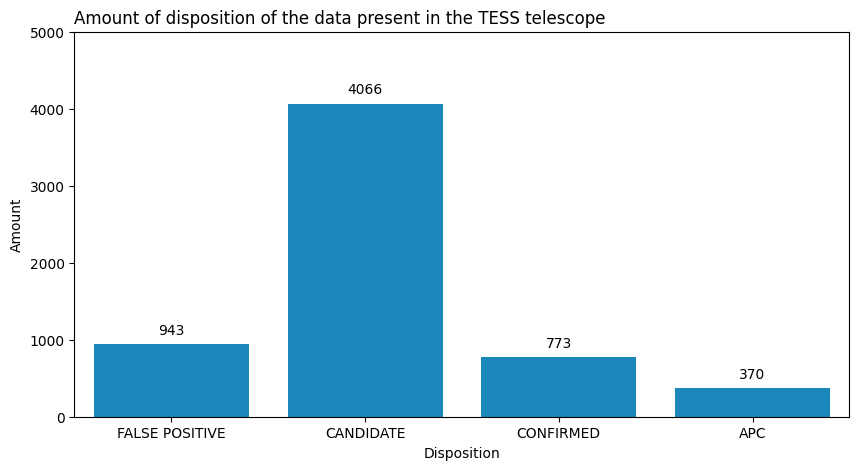

In [11]:
# TESS
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x=df_tess["disposition"], color="#0092D4", ax=ax)
add_value_labels(ax)
plt.title(
    "Amount of disposition of the data present in the TESS telescope", loc="left")
plt.xlabel("Disposition")
plt.ylabel("Amount")
plt.ylim(0, 5000)
plt.show()


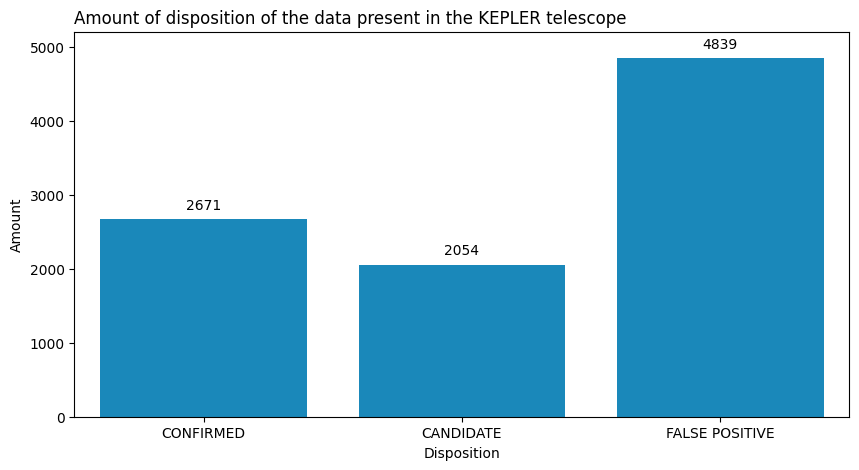

In [12]:
# KEPLER
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x=df_kepler["disposition"], color="#0092D4", ax=ax)
add_value_labels(ax)
plt.title(
    "Amount of disposition of the data present in the KEPLER telescope", loc="left")
plt.xlabel("Disposition")
plt.ylabel("Amount")
plt.ylim(0, 5200)
plt.show()


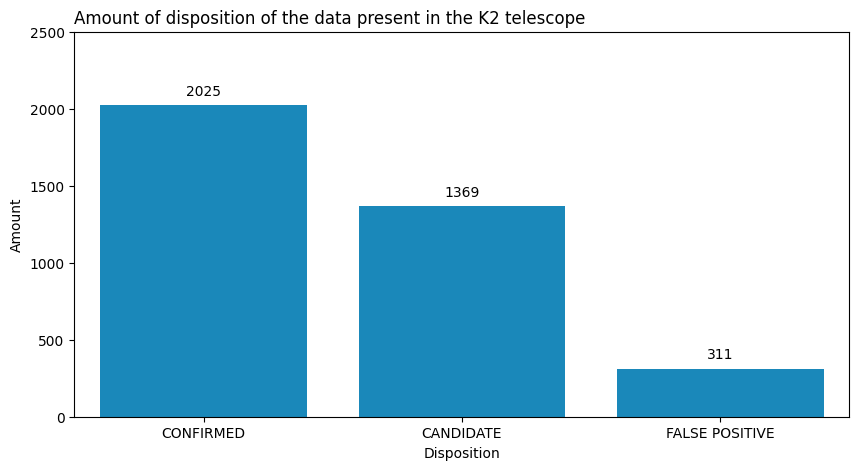

In [13]:
# K2
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x=df_k2["disposition"], color="#0092D4", ax=ax)
add_value_labels(ax)
plt.title("Amount of disposition of the data present in the K2 telescope", loc="left")
plt.xlabel("Disposition")
plt.ylabel("Amount")
plt.ylim(0, 2500)
plt.show()
